# Regions

In [1]:
import libs.plot
import libs.vars
import numpy as np
import xarray

/home/users/woodward/.conda/envs/climate/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


/home/users/woodward/.conda/envs/climate/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/users/woodward/.conda/envs/climate/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/users/woodward/.conda/envs/climate/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/users/woodwar

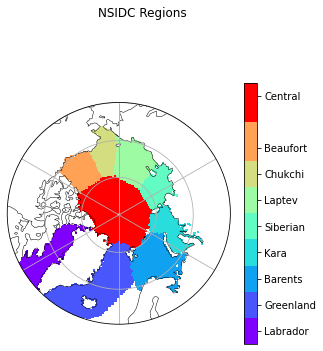

In [2]:
path_nsidc_mask = '_data/_cache/NSIDC_Regions_Masks_Ocean_nearest_s2d.nc'
nsidc_mask = xarray.open_mfdataset(paths=path_nsidc_mask, combine='by_coords').mask
nsidc_regions = [
    r for r in libs.vars.nsidc_regions() if len(r['values']) == 1
]

colormesh_kwargs = {
    'extend': 'neither',
    'cmap': 'rainbow',
    #'levels': 11,
    #'shading': 'auto', # NB change to 'gouraud' if Jaspy
    'vmin': 6,
    'vmax': 15,
    'x': 'longitude', 
    'y': 'latitude'
}

nsidc_mask = nsidc_mask.where(nsidc_mask != 14).where(nsidc_mask > 5).where(nsidc_mask < 16)

fig, subfigs = libs.plot.nstereo(
    [{ 'data': nsidc_mask, 'label': '' }],
    'NSIDC Regions',
    colormesh_kwargs,
    show_colorbar=False
)

values = [r['values'][0] for r in nsidc_regions]
cax = fig.colorbar(
    subfigs[0],
    ax=fig.axes[0],
    label='',
    location='right',
    #pad=0.05,
    shrink=0.8,
    spacing='uniform',
    values=values
)

cax.set_ticks(values)
cax.set_ticklabels([r['label'] for r in nsidc_regions])